# Image Classification with the MNIST Dataset

Deep learning excels at pattern (image) recognition by trial and error. By training a deep neural network with sufficeint data and providing the network with feedback on its performance via training, the network can identify, though a huge amount of iteration, its own set of conditions by which it can act in the correct way.

## The MNIST Dataset

The acurate image classification of the *MNIST dataset* is a collection of 70.000 grayscale images of handwritten digits from 0-9.

## Training and Validation Data and Labels

When working with images for deep learning, weneed both the images themselves, usually denotead as `X`, and also, correct labels for these images, usually denoted as `Y`. Furthermore, we need `X` and `Y` values both for training the model and a separate set of `X` and `Y` values for validating the performence of the model after it has been trained. Therefore, we need 4 segments of data for the MNIST dataset:
 1. `x_train` - images used for training the neural network
 2. `y_train` - correct labels for the `x_train` images, used to evaluate the model's predictions during training
 3. `x_valid` - images set aside for validating the performance of the model after it has been trained
 4. `y_valid` - correct labels for the `x_valid` images, used to evaluate the model's predictions after it has been trained
 
 The process of preparing data for analysis is called *Data Engineering*.

## Loading the Data into Memoey (with Keras)

Keras has many useful built in functions designed for the computer vision tasks. It is also a legitimate choice for deep learning in a professional setting due to its readability and efficiency. One of the many helpful features that Keras provides are modules containing many helper methods for many common datasets, including MNIST.

In [1]:
from tensorflow.keras.datasets import mnist

With the `mnist` module, we can easily load the MNIST data, already partitioned into images and labels for both training and validation.

In [2]:
# the data split between train and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

### Exploring the MNIST Data

Each image itself is a 2D array with the dimensions 28x28.

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_valid.shape

(10000, 28, 28)

These 28x28 images are represented as a collection of unsigned 8-bit integer values
0 and 255, the values corresponding with a pixel's grayscale value where 0 is black and 
255 is white and all other values are in between.

In [5]:
x_train.dtype

dtype('uint8')

In [6]:
x_train.min()

0

In [7]:
x_train.max()

255

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Using `matplotlib` we can render one of these grayscale images in our dataset.

In [9]:
import matplotlib.pyplot as plt

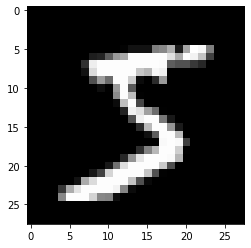

In [10]:
image = x_train[0]
plt.imshow(image, cmap='gray')

The answer what is this number is in the `y_train` data, which contains correct labels for the data.

In [11]:
y_train[0]

5

## Preparing the Data for Training

In deep learning, it is common that data needs to be transformed to be in the ideal state for training. There are 3 tasks we should perform with the data in preparation for training:
1. Flatten the image data, to simplify the image input into the model.
2. Normalize the image data, to make the image input values easier to work with for the model
3. Categorize the labels, to make the label values easier to work with for the model

### Flattening the Image Data

It is possible for a deep learning model to accept a 2-dimensional image but we are going to reshape each image into a single array of 784 continuous pixels. This is also called flattening the image. We will use the helper method `reshape`.

In [12]:
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

The image has been reshaped and is now a collection of 1D arrays containing 784 pixel values each.

In [13]:
x_train.shape

(60000, 784)

In [14]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### Normalizing the Image Data

Deep learning models are better at dealing with floating point numbers between 0 and 1. Converting integer values to floating point values between 0 and 1 is called *normalization*. Here we will divide all the pixel values by 255.

In [15]:
x_train = x_train/255
x_valid = x_valid/255

The values are all floating point values between 0.0 and 1.0.

In [16]:
x_train.dtype

dtype('float64')

In [17]:
x_train.min()

0.0

In [18]:
x_train.max()

1.0

### Categorical encoding \ Categorically Encoding the Labels

Categorical encodingis a kind of transformation that modifies the data so that each value is a collection of all possible categories, with the actual category that this particular value is set as true.
Categorical encoding is tranforming values which are intended to be understood as categorical labels into a representation that makes their categorical nature explicit to the model.

Keras provides a utility to *categorically encode values* and here we use it to perform encoding for both the training and validation labels.

In [19]:
import tensorflow.keras as keras

In [20]:
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

In [21]:
y_train[0:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Creating the Model

With the data prepared for training, it is now time to create the model that we will train with the data. The first basic model will be made up of several layers and will be comprised of 3 main parts:
1. An input layer, which will receive data in some expected format
2. Several *hidden layers*, each comprised of many neurons. Each *neuron* will have the ability to affect the networks's guess with its weights, which are values that will be updated over many iterations as the network gets feedback on its performance and learns
3. An output layer, which will depict the network's guess for a given image

### Instanting the Model

We will use Kera's *Sequential* model class to instantiate an instance of a model that will have a series of layers that data will pass through in sequence.

In [22]:
from tensorflow.keras.models import Sequential

In [23]:
model = Sequential()

### Creating the Input Layer

We will add the input layer which will be densely connected, meaning that each neuron in it, and its weights, will affect every neuron in the next layer. To do this with Keras, we use Kera's *Dense* layer class.

In [24]:
from tensorflow.keras.layers import Dense

The `units` argument specifies the number of neurons in the layer. Choosing the corect number of neurons is what puts the "science" in "data science" as it is a matter of capturing the statistical complexity of the dataset (we are going to use 512).

We will use `relu` activation function, which in short, will help our network to learn how to make more sophisticated guesses about data than if it were required to make guesses based on some striclty linear function.

The `input_shape` value specifies the shape of the incoming data which in our situation is a 1D array of 784 values.

In [25]:
model.add(Dense(units=512, activation='relu', input_shape=(784,)))

### Creating the Hidden Layer

Now we will add an additional densely connected layer. These layers give the network more parameters to contibute towards its guesses, and therefore, more subtle opportunities for accurate learning.

In [26]:
model.add(Dense(units = 512, activation='relu'))

### Creating the Output Layer

Finally, we will add an input layer. This layer uses activation function `softmax` which will result in each of the layer's values being a probability between 0 and 1 and will result in all the outputs of the layer adding to 1. In this case, since the network is to make a guess about a single image belonging to 1 of 10 possible categories, there will be 10 outputs. Each output gices the model's guess (a probability) that the image belongs to specific class.

In [27]:
model.add(Dense(units = 10, activation='softmax'))

### Summarizing the Model

Keras provides the model instance method *summary* which will print readable summary of a model. Note the number of trainable parameters. Each of these can be adjusted during training and will contribute towards the trained model's guesses.

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### Compiling the model

In the final step we need to do before we can actually train our model with data to *compile* it. Here we specify a *loss function* which will be used for the model to undderstand how well it is performing during training. We also specify that becase we would like to track `accuracy` while the model trains.

In [29]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## Training the Model

Now that we have prepared training and validation data and a model, it's time to train our model with our training data and verify it with its validation data. "Training the model with data" is often also called "fitting a model to data".

When fitting (training) a model with Keras, we use the model's *fit* method. It expects the following arguments:
 - the training data
 - the labels for the training data
 - the number of times it should train on the entire training dataset (called an *epoch*)
 - the validation or test data and its labels

In [30]:
history = model.fit(x_train, y_train, epochs=5, verbose=1,
                    validation_data=(x_valid, y_valid))

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1940 - accuracy: 0.9420 - val_loss: 0.1040 - val_accuracy: 0.9708
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1025 - accuracy: 0.9744 - val_loss: 0.0986 - val_accuracy: 0.9742
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0861 - accuracy: 0.9805 - val_loss: 0.1125 - val_accuracy: 0.9752
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0738 - accuracy: 0.9836 - val_loss: 0.1390 - val_accuracy: 0.9768
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0644 - accuracy: 0.9861 - val_loss: 0.1460 - val_accuracy: 0.9800


### Observing accuracy

For each of the 5 epochs, notice the `accuracy` and `val_accuracy` scores. `accuracy` states how well the model did for the epoch on all the training data. `val_accuracy` states how well the model did on the validation data, which if you recall, was not used at all for training the model.

The next step would be to use this model to classify new not-yer-seen handwritten images. This is called *inference*.

MNIST is not only useful for its historical influence on Computer Vision but it's also a great *benchmark* and *debugging tool*.

In [31]:
# Clear the memory
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

## Additional exercise

Ultimately, each neuron is tring to fit a line to some data. Below, we have some datapoints and a randomly drawn line using the equation y = mx + b.

Try changing the `m` and the `b` in order to find the lowest possible loss.

In [32]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

In [33]:
m = 5
b = 15

x = np.array([0,  1,  2,  3,  4,  5,  6,  7,  8,  9])
y = np.array([10, 20, 25, 30, 40, 45, 40, 50, 60, 55])
y_hat = x*m+b

In [34]:
def get_rmse(x_data, y_data, m, b):
    squared_error = 0
    for i in range(len(x_data)):
        y_hat = m*x_data[i]+b
        squared_error += (y_data[i]-y_hat)**2
    mse = squared_error / len(x_data)
    return mse ** .5

print(get_rmse(x, y, m, b))

3.872983346207417


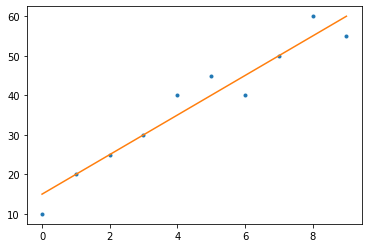

Loss:  15.0


In [35]:
plt.plot(x, y, '.')
plt.plot(x, y_hat, '-')
plt.show()

print("Loss: ", np.sum((y-y_hat)**2)/len(x))

In [36]:
# Clear the memory
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}